this problem is a multi class classification task of predicting the species of the plant based on 
4 features (sepal len,wid and petal len,wid)

LOADING DATASET

In [6]:
import pandas as pd

#loading the dataset as a pandas dataframe
df = pd.read_csv("iris.csv")

#prints first 5 cols of the dataset
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
#shows no of rows and cols in the dataset
df.shape

(150, 5)

In [8]:
#summary statistics of the dataset(only the numerical columns)
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


To know how many classes are present in the target variable and also what is the induvidual no of examples for each class, we can use group by method 

In [9]:
df.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

DATA PREPROCESSING:

In [10]:
#checking if dataset has null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

as there is no null values in the dataset, we can go for further preprocessing steps

In [15]:
#splitting dataset into features(x) and target col(y)

X = df.drop(['species'],axis=1).values
y = df['species'].values

as y has 3 classes, we need to encode it using label encoder

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

next the dataset is split into train and test sets

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

DATA VISUALISATION 

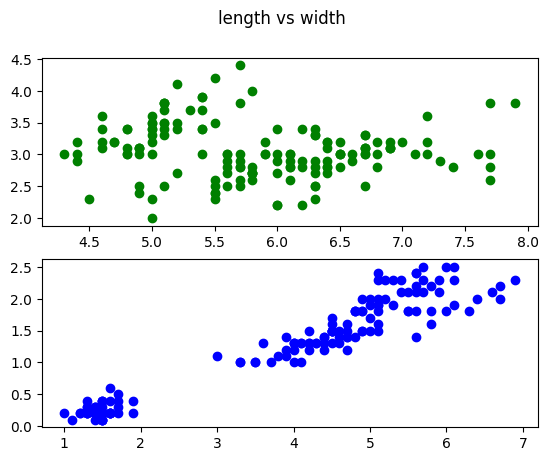

In [38]:
#subplots for sepal len vs width and petal len vs width
import matplotlib.pyplot as plt 
fig, axs = plt.subplots(2)
fig.suptitle('length vs width')
axs[0].plot(df.sepal_length, df.sepal_width,ls='',marker='o',color='g',label='Sepal')
axs[1].plot(df.petal_length, df.petal_width,ls='',marker='o',color='b',label='Petal')

MODEL TRAINING

In [39]:
#Fitting clasifier to the Training set

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score

#Instantiate model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=3)

#Fitting the model
classifier.fit(X_train, y_train)

#Predicting the Test set results
y_pred = classifier.predict(X_test)

MODEL EVALUATION

In [40]:
#confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]])

In [42]:
#classification report, it shows the precision, recall and F1 score of all the 3 classes separately and also the overall accuracy 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



MODEL INTERPRETATION 

=> In class 0, all the exaples in the test set belonging to this class has been correctly predicted 

=> In class 1, only 94% of the samples actually belonging to this class have been perdicted correctly (recall=0.94) 


=> In class 2, only 92% of the samples predicted as this class actually belong to class 2 (precision=0.92) 
y 

=> In 98% of the cases, the model has predicted the class correctl